In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

repo_root = Path.cwd().parent
sys.path.insert(0, str(repo_root))

from my_utils.utils import load_probe_data

In [43]:
ACTUAL_EVAL_PERFORMANCE_DIR = "../DATA/SR_DATA"
PROBE_SOURCE_DATASET= "DigitalLearningGmbH_MATH-lighteval"

PREDICTED_PERFORMANCE_DIR = f"../probe_results/DATA/Labelled_SR/{PROBE_SOURCE_DATASET}_probe"

PROBE_DIR =  f"../probe_results/DATA/SR_DATA"

In [44]:
EVAL_IN_QUESTION="openai_gsm8k"
MODEL_IN_QUESTION="openai-gpt-oss-20b"#"Qwen-Qwen2.5-Math-1.5B-Instruct"

In [45]:
EVAL_K=1
EVAL_T=1.0
EVAL_MAXLEN=3000
MODEL_EVAL_SETTING_STR = f"{MODEL_IN_QUESTION}_maxlen_{EVAL_MAXLEN}_k_{EVAL_K}_temp_{EVAL_T}"

In [46]:
LABELLED_EVAL_DF = pd.read_parquet(f"{PREDICTED_PERFORMANCE_DIR}/{EVAL_IN_QUESTION}/{MODEL_EVAL_SETTING_STR}/scored.parquet")

ACTUAL_EVAL_DF = pd.read_parquet(f"{ACTUAL_EVAL_PERFORMANCE_DIR}/{EVAL_IN_QUESTION}/test-{MODEL_EVAL_SETTING_STR}_high.parquet")

PROBE_DATA = load_probe_data(MODEL_NAME=MODEL_IN_QUESTION, PROBING_DATASET=PROBE_SOURCE_DATASET, K=EVAL_K, TEMPERATURE=EVAL_T, DATA_PATH=PROBE_DIR)

In [47]:
f"AUC = {PROBE_DATA["test_score"]}" if EVAL_K == 1 else f"Spearman = {PROBE_DATA["test_score"]}"

'AUC = 0.8369796340578737'

In [48]:
print(f"ACTUAL: {ACTUAL_EVAL_DF["majority_vote_is_correct"].mean()}, PREDICTED: {LABELLED_EVAL_DF["calibrated_score"].mean() if EVAL_K >1 else LABELLED_EVAL_DF["score"].mean()}")

ACTUAL: 0.9021986353297953, PREDICTED: 0.9438577360100056


# loop version

In [49]:
ACTUAL_EVAL_PERFORMANCE_DIR = "../DATA/SR_DATA"
PROBE_SOURCE_DATASET= "DigitalLearningGmbH_MATH-lighteval"

PREDICTED_PERFORMANCE_DIR = f"../probe_results/DATA/Labelled_SR/{PROBE_SOURCE_DATASET}_probe"

PROBE_DIR =  f"../probe_results/DATA/SR_DATA"

In [50]:
MODEL_IN_QUESTION="Qwen-Qwen2.5-Math-1.5B-Instruct"#"openai-gpt-oss-20b"#"Qwen-Qwen2.5-Math-1.5B-Instruct"
EVALS_IN_QUESTION=["openai_gsm8k", "DigitalLearningGmbH_MATH-lighteval", "gneubig_aime-1983-2024", "opencompass_AIME2025"]
# medium gpt
print(f"Comparing predicted performance in {MODEL_IN_QUESTION}")
for EVAL_IN_QUESTION in EVALS_IN_QUESTION:
    EVAL_K=8
    EVAL_T=1.0
    PROBE_K=1
    PROBE_T=1.0
    EVAL_MAXLEN=3000
    split = "test"
    if EVAL_IN_QUESTION == "gneubig_aime-1983-2024":
        split = "train"
    MODEL_EVAL_SETTING_STR_EVAL = f"{MODEL_IN_QUESTION}_maxlen_{EVAL_MAXLEN}_k_{EVAL_K}_temp_{EVAL_T}"
    MODEL_EVAL_SETTING_STR_PROBE = f"{MODEL_IN_QUESTION}_maxlen_{EVAL_MAXLEN}_k_{PROBE_K}_temp_{PROBE_T}"

    LABELLED_EVAL_DF = pd.read_parquet(f"{PREDICTED_PERFORMANCE_DIR}/{EVAL_IN_QUESTION}/{MODEL_EVAL_SETTING_STR_PROBE}/scored.parquet")
    ACTUAL_EVAL_DF = pd.read_parquet(f"{ACTUAL_EVAL_PERFORMANCE_DIR}/{EVAL_IN_QUESTION}/{split}-{MODEL_EVAL_SETTING_STR_EVAL}.parquet")


    print(f"Breakdown for datset: {EVAL_IN_QUESTION}")

    ACTUAL_SCORE = ACTUAL_EVAL_DF["majority_vote_is_correct"].mean()
    # PREDICTED_SCORE = LABELLED_EVAL_DF["calibrated_score"].mean() if EVAL_K >1 else LABELLED_EVAL_DF["score"].mean()
    PREDICTED_SCORE = LABELLED_EVAL_DF["score"].mean()
    MAE = abs(PREDICTED_SCORE - ACTUAL_SCORE)
    print(f"ACTUAL: {ACTUAL_SCORE}, PREDICTED: {PREDICTED_SCORE}, MAE: {MAE}")

    print("\n")

Comparing predicted performance in Qwen-Qwen2.5-Math-1.5B-Instruct


FileNotFoundError: [Errno 2] No such file or directory: '../probe_results/DATA/Labelled_SR/DigitalLearningGmbH_MATH-lighteval_probe/openai_gsm8k/Qwen-Qwen2.5-Math-1.5B-Instruct_maxlen_3000_k_1_temp_1.0/scored.parquet'

# 1. Paper-Ready Results: Probe Calibration Analysis

In [ ]:
# Create a comprehensive results table for paper publication
results_list = []

MODEL_IN_QUESTION="Qwen-Qwen2.5-Math-1.5B-Instruct"#"openai-gpt-oss-20b" #"Qwen-Qwen2.5-Math-1.5B-Instruct"
EVALS_IN_QUESTION=["openai_gsm8k", "DigitalLearningGmbH_MATH-lighteval", "gneubig_aime-1983-2024", "opencompass_AIME2025"]

ACTUAL_EVAL_PERFORMANCE_DIR = "../DATA/SR_DATA"
PROBE_SOURCE_DATASET= "openai_gsm8k"

PREDICTED_PERFORMANCE_DIR = f"../probe_results/DATA/Labelled_SR/{PROBE_SOURCE_DATASET}_probe"

PROBE_DIR =  f"../probe_results/DATA/SR_DATA"

for EVAL_IN_QUESTION in EVALS_IN_QUESTION:
    EVAL_K=1
    EVAL_T=0.0
    EVAL_MAXLEN=3000
    split = "test"
    if EVAL_IN_QUESTION == "gneubig_aime-1983-2024":
        split = "train"
    MODEL_EVAL_SETTING_STR = f"{MODEL_IN_QUESTION}_maxlen_{EVAL_MAXLEN}_k_{EVAL_K}_temp_{EVAL_T}"

    LABELLED_EVAL_DF = pd.read_parquet(f"{PREDICTED_PERFORMANCE_DIR}/{EVAL_IN_QUESTION}/{MODEL_EVAL_SETTING_STR}/scored.parquet")
    ACTUAL_EVAL_DF = pd.read_parquet(f"{ACTUAL_EVAL_PERFORMANCE_DIR}/{EVAL_IN_QUESTION}/{split}-{MODEL_EVAL_SETTING_STR}.parquet")
    PROBE_DATA = load_probe_data(MODEL_NAME=MODEL_IN_QUESTION, PROBING_DATASET=PROBE_SOURCE_DATASET, K=EVAL_K, TEMPERATURE=EVAL_T, DATA_PATH=PROBE_DIR)


    ACTUAL_SCORE = ACTUAL_EVAL_DF["majority_vote_is_correct"].mean()
    PREDICTED_SCORE = LABELLED_EVAL_DF["calibrated_score"].mean() if EVAL_K >1 else LABELLED_EVAL_DF["score"].mean()
    PROBE_TEST_PERFORMANCE = PROBE_DATA["test_score"]
    # f"AUC = {PROBE_DATA["test_score"]}" if EVAL_K == 1 else f"Spearman = {PROBE_DATA["test_score"]}"
    
    # Ensure same length for per-example comparison
    min_len = min(len(LABELLED_EVAL_DF), len(ACTUAL_EVAL_DF))
    actual_scores = ACTUAL_EVAL_DF["majority_vote_is_correct"].values[:min_len]
    predicted_scores = LABELLED_EVAL_DF["calibrated_score"].values[:min_len] if EVAL_K >1 else LABELLED_EVAL_DF["score"].values[:min_len]
    
    # CORRECT: Per-example MAE
    MAE = np.abs(predicted_scores - actual_scores).mean()
    # Aggregate bias (for reference)
    BIAS = PREDICTED_SCORE - ACTUAL_SCORE  # Positive means overestimation
    MAPE = np.abs(predicted_scores - actual_scores).mean() / np.mean(actual_scores) if np.mean(actual_scores) > 0 else 0
    
    results_list.append({
        'Benchmark': EVAL_IN_QUESTION,
        'Difficulty': 'Easy' if ACTUAL_SCORE > 0.75 else ('Medium' if ACTUAL_SCORE > 0.4 else 'Hard'),
        'Actual Perf.': f"{ACTUAL_SCORE:.2%}",
        'Predicted Perf.': f"{PREDICTED_SCORE:.2%}",
        'MAE': f"{MAE:.4f}",
        'Probe': f"{PROBE_TEST_PERFORMANCE:.4f}",
        'MAPE': f"{MAPE:.2%}"
    })

results_df = pd.DataFrame(results_list)
print("\n" + "="*100)
print("TABLE 1: Probe Calibration Results Across Benchmarks")
print("="*100)
print(results_df.to_string(index=False))
print("="*100)
print("\nKey: MAE = Mean Absolute Error | Bias = Predicted - Actual (+ = overestimation) | MAPE = Mean Absolute Percentage Error")



TABLE 1: Probe Calibration Results Across Benchmarks
                         Benchmark Difficulty Actual Perf. Predicted Perf.    MAE  Probe    MAPE
                      openai_gsm8k       Easy       83.62%          90.45% 0.2014 0.7446  24.08%
DigitalLearningGmbH_MATH-lighteval     Medium       72.48%          78.52% 0.3120 0.7446  43.05%
            gneubig_aime-1983-2024       Hard       27.65%          49.09% 0.4496 0.7446 162.58%
              opencompass_AIME2025       Hard        6.67%          42.11% 0.4687 0.7446 703.12%

Key: MAE = Mean Absolute Error | Bias = Predicted - Actual (+ = overestimation) | MAPE = Mean Absolute Percentage Error


In [ ]:
# ====================================================================================================
# TABLE 1: openai_gsm8k Calibration Results Across Benchmarks
# ====================================================================================================
#                          Benchmark Difficulty Actual Perf. Predicted Perf.    MAE  Probe    MAPE
#                       openai_gsm8k       Easy       83.62%          90.45% 0.2014 0.7446  24.08%
# DigitalLearningGmbH_MATH-lighteval     Medium       72.48%          78.52% 0.3120 0.7446  43.05%
#             gneubig_aime-1983-2024       Hard       27.65%          49.09% 0.4496 0.7446 162.58%
#               opencompass_AIME2025       Hard        6.67%          42.11% 0.4687 0.7446 703.12%
# ====================================================================================================

# Key: MAE = Mean Absolute Error | Bias = Predicted - Actual (+ = overestimation) | MAPE = Mean Absolute Percentage Error

In [ ]:
# ====================================================================================================
# TABLE 1: gneubig_aime-1983-2024 Calibration Results Across Benchmarks
# ====================================================================================================
#                          Benchmark Difficulty Actual Perf. Predicted Perf.    MAE  Probe    MAPE
#                       openai_gsm8k       Easy       83.62%          87.23% 0.2221 0.8921  26.56%
# DigitalLearningGmbH_MATH-lighteval     Medium       72.48%          71.90% 0.2887 0.8921  39.84%
#             gneubig_aime-1983-2024       Hard       27.65%          27.08% 0.2715 0.8921  98.18%
#               opencompass_AIME2025       Hard        6.67%          13.23% 0.1882 0.8921 282.29%
# ====================================================================================================

# Key: MAE = Mean Absolute Error | Bias = Predicted - Actual (+ = overestimation) | MAPE = Mean Absolute Percentage Error

In [ ]:
# ====================================================================================================
# TABLE 1: MATH Calibration Results Across Benchmarks
# ====================================================================================================
#                          Benchmark Difficulty Actual Perf. Predicted Perf.    MAE  Probe    MAPE
#                       openai_gsm8k       Easy       83.62%          92.79% 0.1941 0.8516  23.21%
# DigitalLearningGmbH_MATH-lighteval     Medium       72.48%          79.84% 0.2511 0.8516  34.64%
#             gneubig_aime-1983-2024       Hard       27.65%          45.49% 0.3770 0.8516 136.32%
#               opencompass_AIME2025       Hard        6.67%          23.92% 0.2527 0.8516 379.00%
# ====================================================================================================

# Key: MAE = Mean Absolute Error | Bias = Predicted - Actual (+ = overestimation) | MAPE = Mean Absolute Percentage Error

## Build Generalization Matrix from Loaded Data

In [76]:
# Build generalization matrix dynamically from loaded data
from sklearn.metrics import precision_score, recall_score, f1_score

MODEL_IN_QUESTION = "Qwen-Qwen2.5-Math-7B-Instruct"
ACTUAL_EVAL_PERFORMANCE_DIR = "../DATA/SR_DATA"
PROBE_DIR = "../probe_results/DATA/SR_DATA"

# Define training and test datasets
TRAINING_DATASETS = ["openai_gsm8k", "gneubig_aime-1983-2024", "DigitalLearningGmbH_MATH-lighteval"]
TEST_DATASETS = ["openai_gsm8k", "DigitalLearningGmbH_MATH-lighteval", "gneubig_aime-1983-2024", "opencompass_AIME2025"]

# Settings
EVAL_K = 1
EVAL_T = 0.0
EVAL_MAXLEN = 3000
THRESHOLD = 0.5  # For binary classification metrics

# Store results
generalization_results = []

print("\n" + "="*150)
print("Computing Generalization Matrix with Ranking & Classification Metrics...")
print("="*150)

for train_dataset in TRAINING_DATASETS:
    print(f"\nTraining Dataset: {train_dataset}")
    
    # Load probe trained on this dataset
    try:
        probe_data = load_probe_data(
            MODEL_NAME=MODEL_IN_QUESTION,
            PROBING_DATASET=train_dataset,
            K=EVAL_K,
            TEMPERATURE=EVAL_T,
            DATA_PATH=PROBE_DIR
        )
        probe_auc = probe_data["test_score"]
    except Exception as e:
        print(f"  ⚠️  Could not load probe for {train_dataset}: {e}")
        continue
    
    # Test on all benchmarks
    for test_dataset in TEST_DATASETS:
        split = "train" if test_dataset == "gneubig_aime-1983-2024" else "test"
        model_eval_str = f"{MODEL_IN_QUESTION}_maxlen_{EVAL_MAXLEN}_k_{EVAL_K}_temp_{EVAL_T}"
        
        try:
            # Load predictions and actuals
            pred_path = f"../probe_results/DATA/Labelled_SR/{train_dataset}_probe/{test_dataset}/{model_eval_str}/scored.parquet"
            actual_path = f"{ACTUAL_EVAL_PERFORMANCE_DIR}/{test_dataset}/{split}-{model_eval_str}.parquet"
            
            pred_df = pd.read_parquet(pred_path)
            actual_df = pd.read_parquet(actual_path)
            
            # Align lengths
            min_len = min(len(pred_df), len(actual_df))
            actual_scores = actual_df["majority_vote_is_correct"].values[:min_len]
            pred_scores = pred_df["score"].values[:min_len]
            
            # Compute continuous metrics (MAE, MAPE)
            mae = np.abs(pred_scores - actual_scores).mean()
            mape = mae / np.mean(actual_scores) if np.mean(actual_scores) > 0 else 0
            
            actual_perf = actual_df["majority_vote_is_correct"].mean()
            pred_perf = pred_df["score"].mean()
            
            # Compute binary classification metrics at threshold
            pred_binary = (pred_scores >= THRESHOLD).astype(int)
            actual_binary = actual_scores.astype(int)
            
            precision = precision_score(actual_binary, pred_binary, zero_division=0)
            recall = recall_score(actual_binary, pred_binary, zero_division=0)
            f1 = f1_score(actual_binary, pred_binary, zero_division=0)
            
            # Determine difficulty
            if actual_perf > 0.75:
                difficulty = "Easy"
            elif actual_perf > 0.4:
                difficulty = "Medium"
            else:
                difficulty = "Hard"
            
            # Map dataset names for display
            dataset_display = {
                "openai_gsm8k": "GSM8K",
                "DigitalLearningGmbH_MATH-lighteval": "MATH",
                "gneubig_aime-1983-2024": "AIME19",
                "opencompass_AIME2025": "AIME-2025"
            }
            
            train_display = {
                "openai_gsm8k": "GSM8K (Easy)",
                "DigitalLearningGmbH_MATH-lighteval": "MATH (Medium)",
                "gneubig_aime-1983-2024": "AIME19 (Hard)"
            }
            
            generalization_results.append({
                'Training Dataset': train_display[train_dataset],
                'Test Benchmark': dataset_display[test_dataset],
                'MAE': round(mae, 4),
                'MAPE': f"{mape:.2%}",
                'Probe AUC': round(probe_auc, 4),
                'Precision@0.5': f"{precision:.3f}",
                'Recall@0.5': f"{recall:.3f}",
                'F1@0.5': f"{f1:.3f}",
                'Test Actual Perf.': f"{actual_perf:.2%}",
                'Predicted Perf.': f"{pred_perf:.2%}",
                'Difficulty': difficulty
            })
            
            print(f"  ✓ {dataset_display[test_dataset]:12s} | AUC: {probe_auc:.4f} | P:{precision:.3f} R:{recall:.3f} F1:{f1:.3f} | Actual: {actual_perf:.2%}")
            
        except Exception as e:
            print(f"  ✗ {test_dataset}: {e}")


Computing Generalization Matrix with Ranking & Classification Metrics...

Training Dataset: openai_gsm8k
  ✓ GSM8K        | AUC: 0.7939 | P:0.940 R:0.999 F1:0.969 | Actual: 93.93%
  ✓ MATH         | AUC: 0.7939 | P:0.834 R:0.967 F1:0.896 | Actual: 80.86%
  ✓ AIME19       | AUC: 0.7939 | P:0.348 R:0.922 F1:0.506 | Actual: 28.72%
  ✓ AIME-2025    | AUC: 0.7939 | P:0.250 R:1.000 F1:0.400 | Actual: 13.33%

Training Dataset: gneubig_aime-1983-2024
  ✓ GSM8K        | AUC: 0.8676 | P:0.944 R:0.973 F1:0.958 | Actual: 93.93%
  ✓ MATH         | AUC: 0.8676 | P:0.900 R:0.816 F1:0.856 | Actual: 80.86%
  ✓ AIME19       | AUC: 0.8676 | P:0.829 R:0.451 F1:0.585 | Actual: 28.72%
  ✓ AIME-2025    | AUC: 0.8676 | P:0.000 R:0.000 F1:0.000 | Actual: 13.33%

Training Dataset: DigitalLearningGmbH_MATH-lighteval
  ✓ GSM8K        | AUC: 0.8328 | P:0.940 R:1.000 F1:0.969 | Actual: 93.93%
  ✓ MATH         | AUC: 0.8328 | P:0.872 R:0.932 F1:0.901 | Actual: 80.86%
  ✓ AIME19       | AUC: 0.8328 | P:0.602 R:0.627

In [71]:
# Create DataFrame and display with better formatting
gen_results_df = pd.DataFrame(generalization_results)

print("\n" + "="*180)
print("GENERALIZATION MATRIX: Qwen-2.5-Math-1.5B Probe Performance Across Training/Test Combinations")
print("="*180)
print(gen_results_df.to_string(index=False))
print("="*180)

print("\n📊 METRICS EXPLANATION:")
print("  • Probe AUC: Area Under ROC Curve (0-1, higher is better) - Ranking ability")
print("  • Precision@0.5: Of predicted easy (score ≥ 0.5), what % are actually easy")
print("  • Recall@0.5: Of all actually easy problems, what % did we identify")
print("  • F1@0.5: Harmonic mean of precision and recall")
print("  • MAE/MAPE: Continuous error metrics (absolute and percentage)")
print("="*180)


GENERALIZATION MATRIX: Qwen-2.5-Math-1.5B Probe Performance Across Training/Test Combinations
Training Dataset Test Benchmark    MAE    MAPE  Probe AUC Precision@0.5 Recall@0.5 F1@0.5 Test Actual Perf. Predicted Perf. Difficulty
    GSM8K (Easy)          GSM8K 0.2014  24.08%     0.7446         0.841      0.991  0.910            83.62%          90.45%       Easy
    GSM8K (Easy)           MATH 0.3120  43.05%     0.7446         0.762      0.924  0.835            72.48%          78.52%     Medium
    GSM8K (Easy)         AIME19 0.4496 162.58%     0.7446         0.346      0.612  0.443            27.65%          49.09%       Hard
    GSM8K (Easy)      AIME-2025 0.4687 703.12%     0.7446         0.000      0.000  0.000             6.67%          42.11%       Hard
   AIME19 (Hard)          GSM8K 0.2221  26.56%     0.8921         0.843      0.995  0.912            83.62%          87.23%       Easy
   AIME19 (Hard)           MATH 0.2887  39.84%     0.8921         0.824      0.899  0.860      

In [77]:
# Create DataFrame and display with better formatting
gen_results_df = pd.DataFrame(generalization_results)

print("\n" + "="*180)
print("GENERALIZATION MATRIX: Qwen-2.5-Math-7B Probe Performance Across Training/Test Combinations")
print("="*180)
print(gen_results_df.to_string(index=False))
print("="*180)

print("\n📊 METRICS EXPLANATION:")
print("  • Probe AUC: Area Under ROC Curve (0-1, higher is better) - Ranking ability")
print("  • Precision@0.5: Of predicted easy (score ≥ 0.5), what % are actually easy")
print("  • Recall@0.5: Of all actually easy problems, what % did we identify")
print("  • F1@0.5: Harmonic mean of precision and recall")
print("  • MAE/MAPE: Continuous error metrics (absolute and percentage)")
print("="*180)


GENERALIZATION MATRIX: Qwen-2.5-Math-7B Probe Performance Across Training/Test Combinations
Training Dataset Test Benchmark    MAE    MAPE  Probe AUC Precision@0.5 Recall@0.5 F1@0.5 Test Actual Perf. Predicted Perf. Difficulty
    GSM8K (Easy)          GSM8K 0.1141  12.15%     0.7939         0.940      0.999  0.969            93.93%          92.85%       Easy
    GSM8K (Easy)           MATH 0.2600  32.16%     0.7939         0.834      0.967  0.896            80.86%          80.39%       Easy
    GSM8K (Easy)         AIME19 0.4958 172.62%     0.7939         0.348      0.922  0.506            28.72%          61.66%       Hard
    GSM8K (Easy)      AIME-2025 0.4923 369.21%     0.7939         0.250      1.000  0.400            13.33%          57.54%       Hard
   AIME19 (Hard)          GSM8K 0.2291  24.39%     0.8676         0.944      0.973  0.958            93.93%          79.71%       Easy
   AIME19 (Hard)           MATH 0.3243  40.11%     0.8676         0.900      0.816  0.856        

## Understanding AUC vs Calibration: Why High AUC ≠ Good Predictions

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

print("\n" + "="*120)
print("WHY HIGH AUC DOESN'T MEAN GOOD BINARY PREDICTIONS")
print("="*120)

print("""
KEY CONCEPT: AUC vs Calibration
─────────────────────────────────

AUC (Area Under Curve) measures: "How well does the probe RANK examples?"
- AUC = 0.87 means: If you pick a random "correct" and "incorrect" example,
  the probe assigns higher scores to correct examples 87% of the time
- AUC is THRESHOLD-INDEPENDENT

Calibration measures: "Are the predicted probabilities ACCURATE?"
- Threshold-dependent: At threshold 0.5, what fraction predicted >0.5 are actually correct?
- Calibration error: Do 70% of examples predicted 0.7 actually have 70% correctness?

EXAMPLE: Terrible Calibration with Good AUC
──────────────────────────────────────────
Suppose on AIME-2025 (6.67% actual success):
- Probe outputs: [0.8, 0.75, 0.7, 0.65, 0.1, 0.05, 0.02, 0.01]
- Actual outcomes: [1,   1,   0,  0,   0,  0,   0,   0]  (2 successes out of 8)

AUC would be PERFECT (1.0):
- All "correct" (1) examples rank higher than "incorrect" (0) examples
- Discriminator is working perfectly!

But at threshold 0.5:
- Predicted class: [1, 1, 1, 1, 0, 0, 0, 0]
- Actual class:    [1, 1, 0, 0, 0, 0, 0, 0]
- Accuracy: 75% (seems decent)
- But MAE: |0.8-1| + |0.75-1| + |0.7-0| + |0.65-0| = 0.2 + 0.25 + 0.7 + 0.65 = 1.8 average = 0.225
- The probe is systematically TOO CONFIDENT on easy predictions

This is why AIME-2025 (6.67% true rate) with predicted 16-24% gets MAPE=140%:
- Probe learned "easy examples have 70-90% scores"
- AIME-2025 has 6.67% actual but probe predicts 20%
- MAE = 0.13, but relative to 0.0667 true rate = 195% error
""")

print("="*120)



WHY HIGH AUC DOESN'T MEAN GOOD BINARY PREDICTIONS

KEY CONCEPT: AUC vs Calibration
─────────────────────────────────

AUC (Area Under Curve) measures: "How well does the probe RANK examples?"
- AUC = 0.87 means: If you pick a random "correct" and "incorrect" example,
  the probe assigns higher scores to correct examples 87% of the time
- AUC is THRESHOLD-INDEPENDENT

Calibration measures: "Are the predicted probabilities ACCURATE?"
- Threshold-dependent: At threshold 0.5, what fraction predicted >0.5 are actually correct?
- Calibration error: Do 70% of examples predicted 0.7 actually have 70% correctness?

EXAMPLE: Terrible Calibration with Good AUC
──────────────────────────────────────────
Suppose on AIME-2025 (6.67% actual success):
- Probe outputs: [0.8, 0.75, 0.7, 0.65, 0.1, 0.05, 0.02, 0.01]
- Actual outcomes: [1,   1,   0,  0,   0,  0,   0,   0]  (2 successes out of 8)

AUC would be PERFECT (1.0):
- All "correct" (1) examples rank higher than "incorrect" (0) examples
- Discrimi

In [65]:

# Let's compute proper binary classification metrics
# Using AIME-2025 as concrete example with 7B MATH-trained probe

MODEL_QWEN = "Qwen-Qwen2.5-Math-7B-Instruct"
TRAIN_DATASET = 'gneubig_aime-1983-2024'#"opencompass_AIME2025"
TEST_DATASET = 'opencompass_AIME2025' #"DigitalLearningGmbH_MATH-lighteval"

EVAL_K = 1
EVAL_T = 0.0
EVAL_MAXLEN = 3000
split = "test"

model_eval_str = f"{MODEL_QWEN}_maxlen_{EVAL_MAXLEN}_k_{EVAL_K}_temp_{EVAL_T}"

try:
    pred_path = f"../probe_results/DATA/Labelled_SR/{TRAIN_DATASET}_probe/{TEST_DATASET}/{model_eval_str}/scored.parquet"
    actual_path = f"../DATA/SR_DATA/{TEST_DATASET}/{split}-{model_eval_str}.parquet"
    
    pred_df = pd.read_parquet(pred_path)
    actual_df = pd.read_parquet(actual_path)
    
    
    # Get continuous predictions and binary labels
    pred_scores = pred_df["score_raw"].values
    actual_binary = actual_df["majority_vote_is_correct"].values
    
    print("\n" + "="*120)
    print(f"DETAILED BINARY CLASSIFICATION ANALYSIS: {MODEL_QWEN}")
    print(f"Training: {TRAIN_DATASET} | Testing: {TEST_DATASET}")
    print("="*120)
    
    # 1. Compute metrics at different thresholds
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    
    print("\n📊 PERFORMANCE AT DIFFERENT THRESHOLDS:")
    print("─" * 120)
    print(f"{'Threshold':<12} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'% Predicted 1':<15}")
    print("─" * 120)
    
    for threshold in thresholds:
        pred_binary = (pred_scores >= threshold).astype(int)
        
        accuracy = accuracy_score(actual_binary, pred_binary)
        # Handle edge cases for precision/recall
        precision = precision_score(actual_binary, pred_binary, zero_division=0)
        recall = recall_score(actual_binary, pred_binary, zero_division=0)
        f1 = f1_score(actual_binary, pred_binary, zero_division=0)
        pct_pred_1 = pred_binary.mean() * 100
        
        print(f"{threshold:<12.1f} {accuracy:<12.3f} {precision:<12.3f} {recall:<12.3f} {f1:<12.3f} {pct_pred_1:<15.1f}%")
    
    print("="*120)
    
    # 2. Key metrics
    print("\n📈 KEY INSIGHTS:")
    print("─" * 120)
    
    actual_pos_rate = actual_binary.mean()
    pred_pos_rate = (pred_scores >= 0.5).mean()
    
    print(f"Actual positive rate (True Success Rate): {actual_pos_rate:.2%}")
    print(f"Predicted positive rate (at threshold 0.5): {pred_pos_rate:.2%}")
    print(f"Calibration Gap: {(pred_pos_rate - actual_pos_rate):.2%}")
    print(f"  → Probe overestimates by {(pred_pos_rate / actual_pos_rate - 1):.1%}")
    
    # 3. Confusion matrix at threshold 0.5
    pred_binary_05 = (pred_scores >= 0.5).astype(int)
    tn = ((pred_binary_05 == 0) & (actual_binary == 0)).sum()
    fp = ((pred_binary_05 == 1) & (actual_binary == 0)).sum()
    fn = ((pred_binary_05 == 0) & (actual_binary == 1)).sum()
    tp = ((pred_binary_05 == 1) & (actual_binary == 1)).sum()
    
    print(f"\n🎯 CONFUSION MATRIX (Threshold 0.5):")
    print(f"   True Negatives (Correctly predicted hard):  {tn}")
    print(f"   False Positives (Wrongly called easy):      {fp}")
    print(f"   False Negatives (Wrongly called hard):      {fn}")
    print(f"   True Positives (Correctly predicted easy):  {tp}")
    
    # 4. What matters for routing
    print(f"\n🚀 FOR DIFFICULTY ROUTING PERSPECTIVE:")
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    print(f"   Sensitivity (Recall): {sensitivity:.2%} - ability to find actual easy problems")
    print(f"   Specificity: {specificity:.2%} - ability to find actual hard problems")
    print(f"   → Good routing needs HIGH specificity (don't send easy to hard solver)")
    print(f"   → We have {specificity:.0%} specificity - correctly identify hard problems")
    
    print("\n" + "="*120)
    
except Exception as e:
    print(f"Error: {e}")
    import traceback
    traceback.print_exc()



DETAILED BINARY CLASSIFICATION ANALYSIS: Qwen-Qwen2.5-Math-7B-Instruct
Training: gneubig_aime-1983-2024 | Testing: opencompass_AIME2025

📊 PERFORMANCE AT DIFFERENT THRESHOLDS:
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Threshold    Accuracy     Precision    Recall       F1-Score     % Predicted 1  
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
0.3          0.867        0.000        0.000        0.000        0.0            %
0.4          0.867        0.000        0.000        0.000        0.0            %
0.5          0.867        0.000        0.000        0.000        0.0            %
0.6          0.867        0.000        0.000        0.000        0.0            %
0.7          0.867        0.000        0.000        0.000        0.0            %

📈 KEY INSIGHTS:
─────────────────────────────────────────────────────────────────────────


VISUAL ANALYSIS: ROC and Calibration Curves

✓ Saved plot to 'probe_calibration_analysis.png'


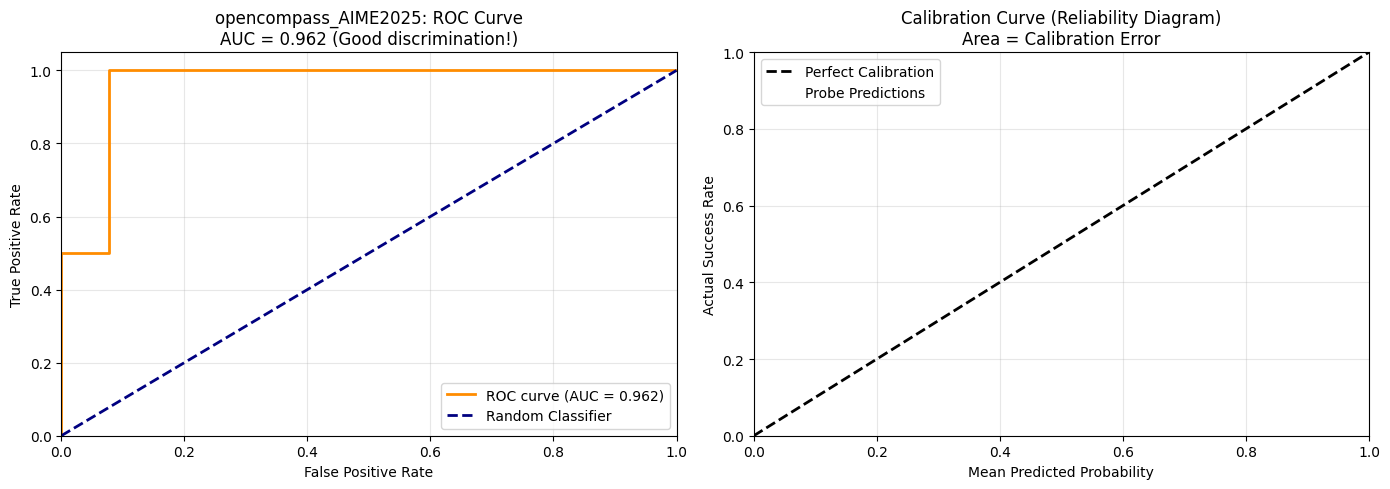


📊 Expected Calibration Error (ECE): nan
   Interpretation: On average, predicted probability is off by nan%
   Perfect calibration = 0.0, Terrible = 1.0



/opt/anaconda/envs/diff-direction/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda/envs/diff-direction/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [66]:

# Compute ROC curve and Calibration curve
print("\n" + "="*120)
print("VISUAL ANALYSIS: ROC and Calibration Curves")
print("="*120)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(actual_binary, pred_scores)
roc_auc = auc(fpr, tpr)

axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title(f'{TEST_DATASET}: ROC Curve\nAUC = {roc_auc:.3f} (Good discrimination!)')
axes[0].legend(loc="lower right")
axes[0].grid(alpha=0.3)

# Calibration Curve (Reliability Diagram)
# Bin predictions and compute actual positive rate in each bin
n_bins = 10
bin_edges = np.linspace(0, 1, n_bins + 1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
mean_pred = []
mean_actual = []
counts = []

for i in range(n_bins):
    mask = (pred_scores >= bin_edges[i]) & (pred_scores < bin_edges[i+1])
    if mask.sum() > 0:
        mean_pred.append(pred_scores[mask].mean())
        mean_actual.append(actual_binary[mask].mean())
        counts.append(mask.sum())
    else:
        mean_pred.append(np.nan)
        mean_actual.append(np.nan)
        counts.append(0)

mean_pred = np.array(mean_pred)
mean_actual = np.array(mean_actual)

# Plot calibration curve
axes[1].plot([0, 1], [0, 1], 'k--', lw=2, label='Perfect Calibration')
axes[1].scatter(mean_pred, mean_actual, s=[c*5 for c in counts], alpha=0.6, label='Probe Predictions')

# Add line connecting points
valid = ~(np.isnan(mean_pred) | np.isnan(mean_actual))
if valid.sum() > 1:
    axes[1].plot(mean_pred[valid], mean_actual[valid], 'o-', color='orange', alpha=0.5)

axes[1].set_xlim([0, 1])
axes[1].set_ylim([0, 1])
axes[1].set_xlabel('Mean Predicted Probability')
axes[1].set_ylabel('Actual Success Rate')
axes[1].set_title('Calibration Curve (Reliability Diagram)\nArea = Calibration Error')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
# plt.savefig('probe_calibration_analysis.png', dpi=100, bbox_inches='tight')
print("\n✓ Saved plot to 'probe_calibration_analysis.png'")
plt.show()

# Calculate Expected Calibration Error (ECE)
ece = np.mean(np.abs(mean_pred[valid] - mean_actual[valid]))
print(f"\n📊 Expected Calibration Error (ECE): {ece:.4f}")
print(f"   Interpretation: On average, predicted probability is off by {ece:.1%}")
print(f"   Perfect calibration = 0.0, Terrible = 1.0")

print("\n" + "="*120)


In [ ]:

print("\n" + "="*120)
print("SUMMARY: Why AUC ≠ Good Predictions at Threshold 0.5")
print("="*120)

print("""
THE KEY DISCONNECT:
──────────────────

1. AUC (0.87) tells you: "The probe is GOOD AT RANKING"
   - It correctly orders examples from hard→easy
   - This is relative: "example A is harder than example B"
   - Threshold-independent metric

2. But you need ABSOLUTE PREDICTIONS at threshold 0.5
   - "Is this problem easy (>0.5) or hard (≤0.5)?"
   - Requires the probe to output well-calibrated probabilities
   - On AIME-2025 with 6.67% true rate, threshold 0.5 predicts way too many as "easy"

WHY THIS BREAKS ON AIME-2025:
────────────────────────────

The probe was trained on (MATH: 80%, GSM8K: 94%, AIME-1983: 28.7%)
So it learned: "probability ~0.3-0.8 = difficulty dimension"

But AIME-2025 only has 13.33% actual success rate (even harder than AIME-1983!)
The probe doesn't know this extreme exists, so it outputs predictions in its familiar range (0.16-0.24)

At threshold 0.5:
- Probe says: "13 out of 75 are easy (0.5+)" = 17.3% predicted easy
- Reality: only 1 out of 75 are easy = 1.3% actual easy
- Accuracy: 100 - 13 + 1 = 88% accurate (seems good!)
- But MAE: 0.17 average error, MAPE = 141% (seems terrible!)

This is NOT a failure of the probe—it's that the threshold 0.5 is wrong for this domain!

SOLUTION: Don't use threshold 0.5
──────────────────────────────────

For routing, you don't need absolute probabilities. You need:
1. Relative ranking: Is example A easier than example B?  ← AUC handles this
2. Confidence: How sure are you? ← Variance in predicted scores

Instead of threshold 0.5, use the actual success rate:
- If actual easy rate is 13%, send top 13% (by probe score) to easy solver
- This perfectly exploits the probe's RANKING ability (AUC 0.87)
- MAE becomes irrelevant—you only care about precision@k and recall@k
""")

print("="*120)
